In [1]:
#####################################################################
# Examples below are (more or less) taken from 
# “Python for Data Analysis" by William Wesley McKinney (O’Reilly).
# Copyright 2012 William McKinney, 978-1-449-31979-3.
#
# TOPICS COVERED:
# - Plotting Functions in pandas
#####################################################################

# This notebook is written in Python 3.

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting Functions in pandas

### Line Plots

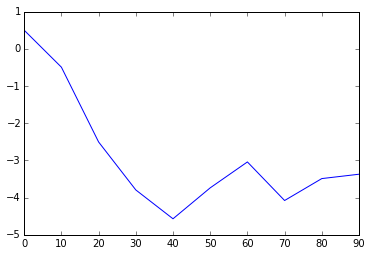

In [3]:
# Plotting a series
s = Series(np.random.randn(10).cumsum(),
           index=np.arange(0, 100, 10))
s.plot()
plt.show()

# Series' index is automatically passed through to be used as the x-axis.
# To disable this, pass use_index = False.

In [4]:
# Plotting a DataFrame
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.646003,0.894704,0.185298,1.382107
10,-2.496315,1.805411,0.970693,1.374600
20,-3.498393,0.901708,0.252530,1.465207
30,-4.767851,1.710128,-0.811107,1.807616
40,-6.440884,0.883026,1.125066,2.501217
50,-3.990663,1.289925,2.165956,3.164289
60,-3.433744,-0.575431,1.394203,1.689588
70,-3.942641,-0.435603,2.366938,1.423347
80,-4.817402,-0.868355,1.931905,0.506425
90,-5.644789,-0.514613,2.320089,-0.446839


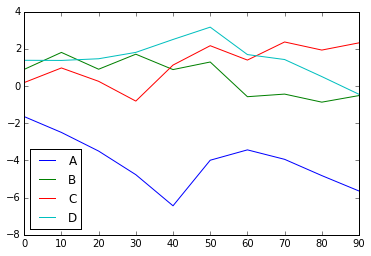

In [7]:
# Each column results in one line, legend is generated
df.plot()
plt.show()

### Bar Plots

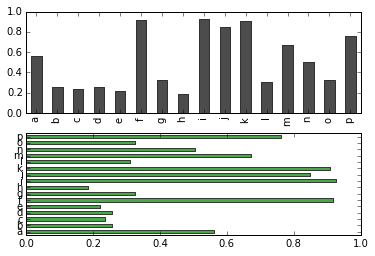

In [10]:
# bar plot for series
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar' , ax=axes[0], color='k', alpha=0.7)  # vertical bars
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.7)  # horizontal bars
plt.show()

In [11]:
# bar plot for DataFrame
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.779599,0.693827,0.172137,0.446267
two,0.089400,0.808034,0.604669,0.435983
three,0.182793,0.751732,0.398163,0.023686
four,0.311024,0.902818,0.620359,0.353824
five,0.921597,0.856653,0.046271,0.658834
six,0.621607,0.444201,0.879261,0.507858


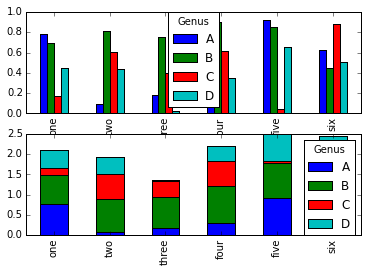

In [16]:
fig, axes = plt.subplots(2, 1)
df.plot(kind='bar', ax = axes[0])                  # each col gets its own bar,
                                                   # grouped by row
df.plot(kind='bar', stacked = True, ax = axes[1])  # each row gets a stacked bar
plt.show()

In [40]:
tips = pd.read_csv('Datasets/tips.csv')
party_counts = pd.crosstab(tips.day, tips['size'])  # cross-tabulate
party_counts
# Note that tips.size can't be used as it ends up referring to the size
# of the tips DataFrame.

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


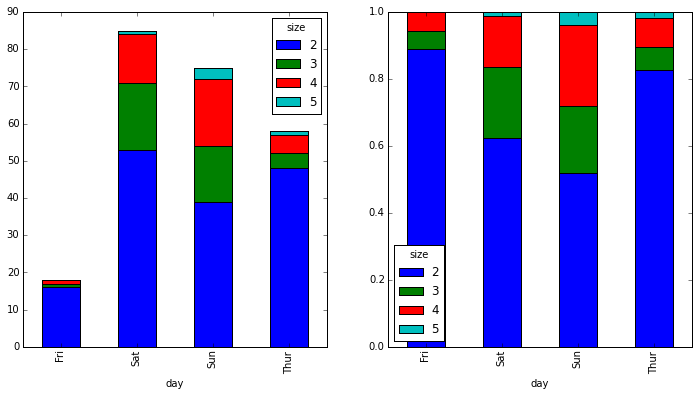

In [49]:
party_counts = party_counts.ix[:, 2:5 ]  # Remove parties of 1 & 6 as there aren't many
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
party_counts.plot(kind='bar', stacked = True, ax = axes[0])  # bar chart of frequencies

# Normalise to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
print(party_pcts)
party_pcts.plot(kind='bar', stacked = True, ax = axes[1])
plt.show()

### Histogram & Density Plots

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


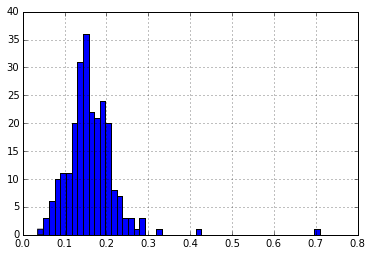

In [51]:
# Histogram of tip percentage
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)
plt.show()

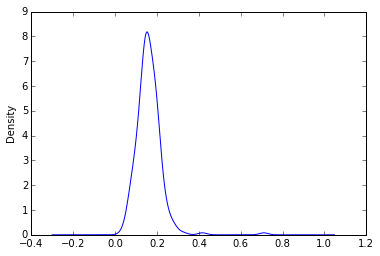

In [52]:
# Density plot (estimate of a continuous probability density that might have 
# generated the observed data)
tips['tip_pct'].plot(kind='kde')
plt.show()

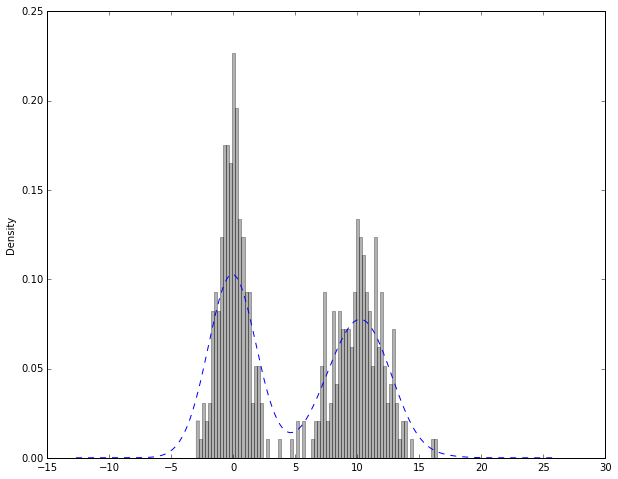

In [57]:
# Example of histogram + density plot
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))

plt.figure(figsize=(10, 8))
values.hist(bins=80, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='b--')
plt.show()

In [58]:
# Scatterplot Example
macro = pd.read_csv('Datasets/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


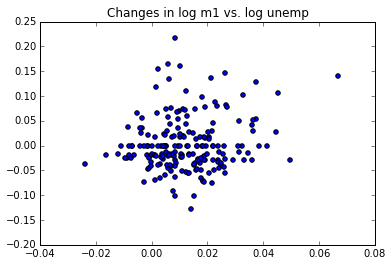

In [59]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))
plt.show()